In [1]:
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
from numf.peaks import get_neighbors
import matplotlib.pyplot as plt
from numf.utils import initialize_matrices
from numf.numf import numf

In [2]:
df = pd.read_csv('../data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228734,ZWE,Africa,Zimbabwe,2022-10-15,257827.0,0.0,24.571,5605.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,15993524.0,NaN,NaN,NaN,NaN
228735,ZWE,Africa,Zimbabwe,2022-10-16,257893.0,66.0,34.000,5606.0,1.0,0.286,...,30.7,36.791,1.7,61.49,0.571,15993524.0,NaN,NaN,NaN,NaN
228736,ZWE,Africa,Zimbabwe,2022-10-17,257893.0,0.0,20.571,5606.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,15993524.0,NaN,NaN,NaN,NaN
228737,ZWE,Africa,Zimbabwe,2022-10-18,257893.0,0.0,20.571,5606.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,15993524.0,NaN,NaN,NaN,NaN


In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df[['continent', 'date', 'new_cases']]

In [4]:
df.groupby(by=['continent', 'date']).sum()
df = df.reindex()
df

,continent,date,new_cases
0,Asia,2020-02-24,5.0
1,Asia,2020-02-25,0.0
2,Asia,2020-02-26,0.0
3,Asia,2020-02-27,0.0
4,Asia,2020-02-28,0.0
...,...,...,...
228734,Africa,2022-10-15,0.0
228735,Africa,2022-10-16,66.0
228736,Africa,2022-10-17,0.0
228737,Africa,2022-10-18,0.0


In [5]:
df = df.pivot_table(values='new_cases', index='date', columns='continent')
df

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-23,NaN,10.888889,NaN,1.000000,NaN,NaN
2020-01-24,NaN,31.444444,2.000000,1.000000,NaN,NaN
2020-01-25,NaN,44.727273,1.000000,0.000000,NaN,NaN
2020-01-26,NaN,61.454545,0.000000,1.500000,4.000000,NaN
2020-01-27,NaN,62.076923,0.500000,0.000000,1.000000,NaN
...,...,...,...,...,...,...
2022-10-15,11.290909,2610.816327,1672.139535,284.764706,36.529412,547.800000
2022-10-16,6.425926,2208.208333,1283.837209,252.058824,887.529412,623.500000
2022-10-17,42.415094,2087.791667,8986.325581,1217.625000,72.000000,518.888889


In [6]:
# removing NaN values
df = df[~df.isna().any(axis=1)]
df

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-02-23,0.000000,11.736842,11.000000,0.500000,0.000000,2.000000
2020-02-24,0.000000,20.458333,8.444444,0.500000,0.000000,0.000000
2020-02-25,0.500000,29.720000,8.916667,1.500000,0.000000,0.000000
2020-02-26,0.000000,30.730769,10.533333,0.500000,0.000000,0.500000
2020-02-27,0.000000,42.000000,13.105263,1.500000,0.000000,0.000000
...,...,...,...,...,...,...
2022-10-15,11.290909,2610.816327,1672.139535,284.764706,36.529412,547.800000
2022-10-16,6.425926,2208.208333,1283.837209,252.058824,887.529412,623.500000
2022-10-17,42.415094,2087.791667,8986.325581,1217.625000,72.000000,518.888889


<AxesSubplot:xlabel='date'>

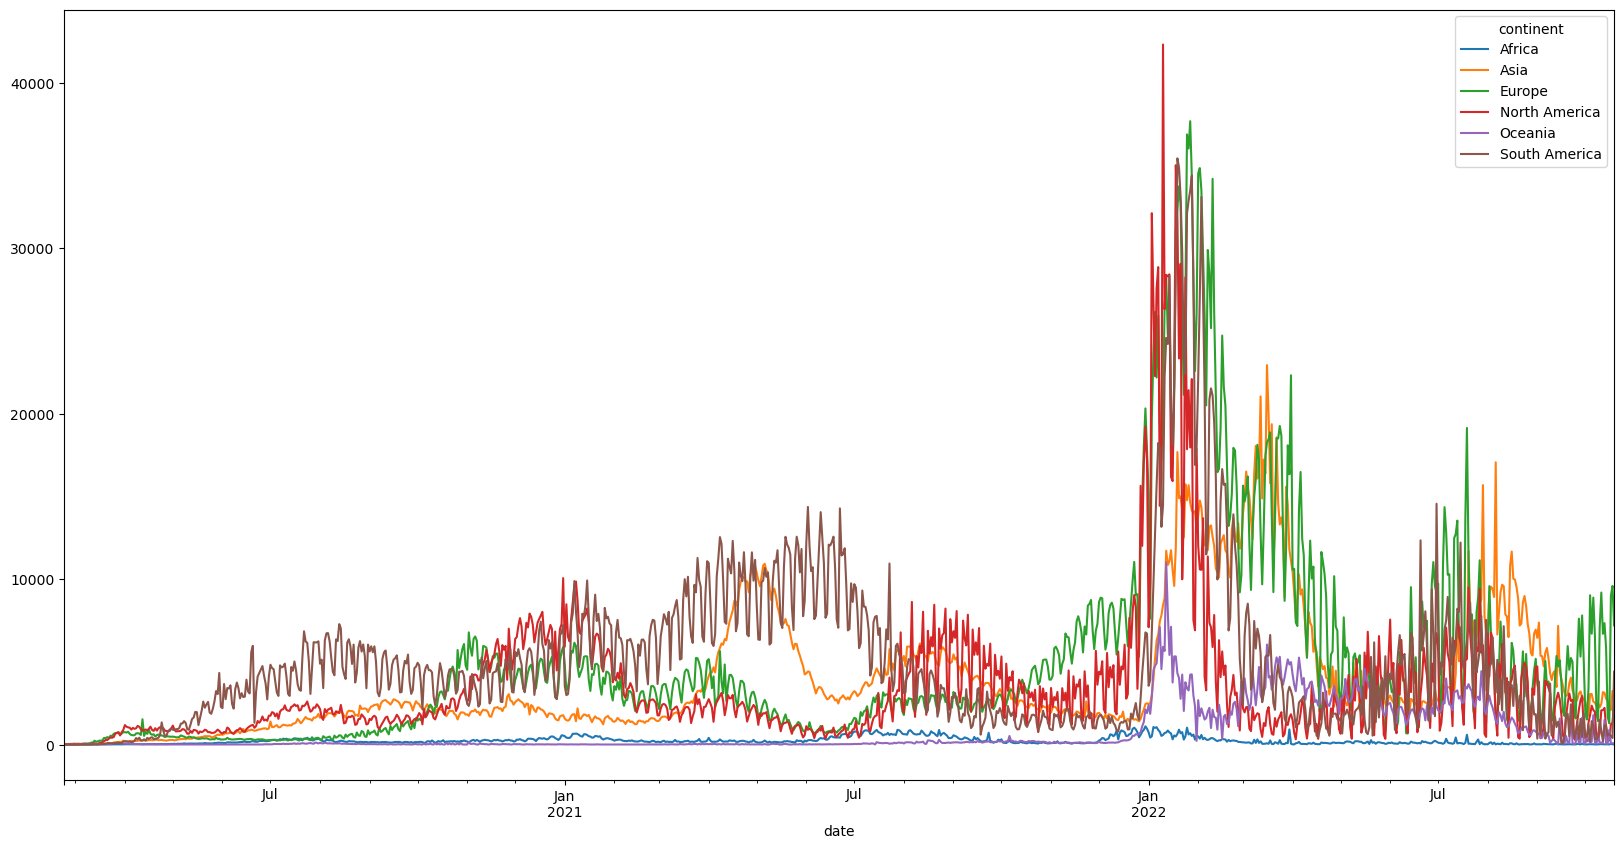

In [7]:
df.plot(figsize=(20, 10))

<AxesSubplot:xlabel='date'>

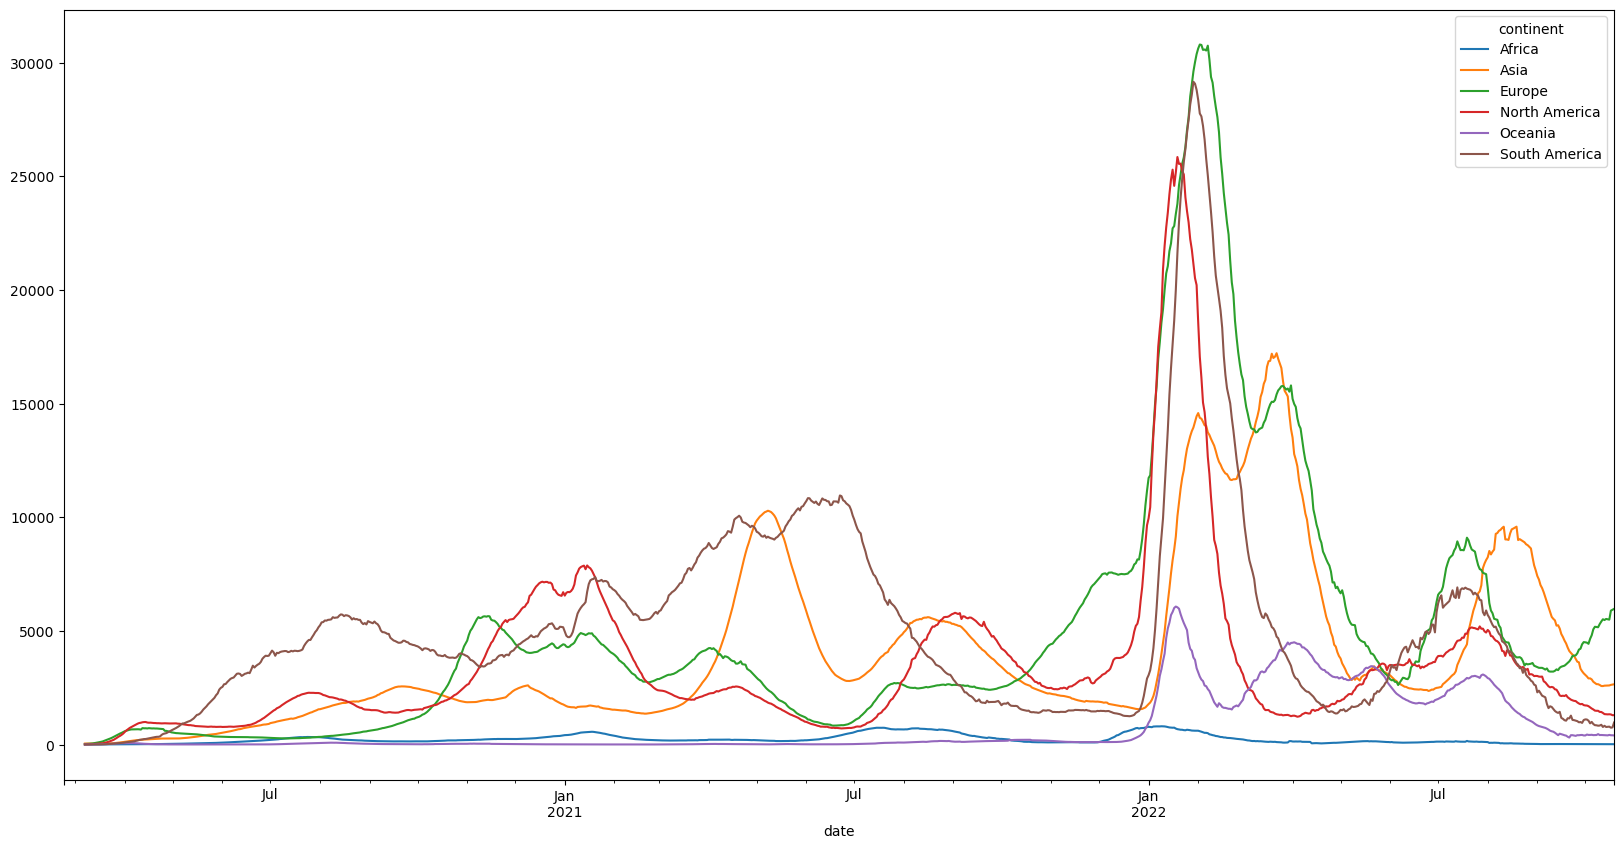

In [8]:
df2 = df.copy()
for col in df2.columns:
    df2[col] = df2[col].rolling(window=14).mean()
df2.plot(figsize=(20, 10))


<AxesSubplot:xlabel='date'>

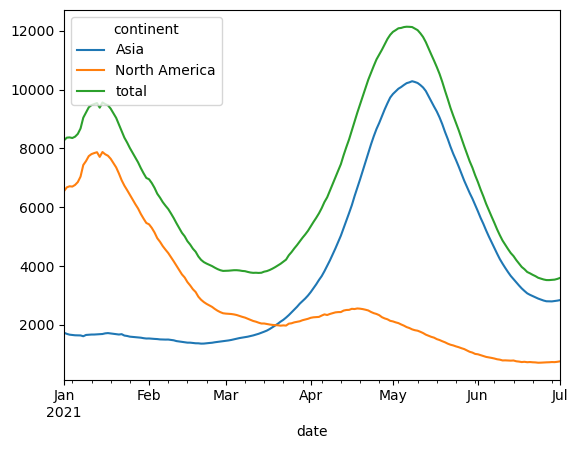

In [9]:
df3 = df2.loc['2021-01-01': '2021-07-01', ['Asia', 'North America']]
df3['total'] = df3.sum(axis=1)
df3.plot()

In [10]:
M = df3['total'].to_numpy().reshape(-1, 1)
r = 2
m, n = M.shape

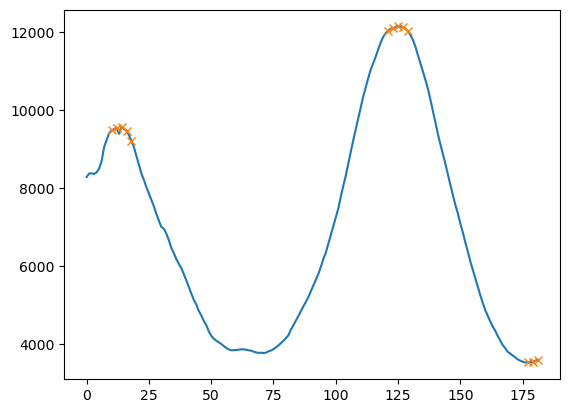

In [11]:
peaks, _ = find_peaks(x=M.reshape(m, ), prominence=1, width=6)
peaks = np.append(peaks, [m - 1])
pvals = get_neighbors(peaks, m, nrad=4)

plt.plot(M)
plt.plot(pvals, M[pvals], 'x')

In [19]:
W0, H0 = initialize_matrices(m, n, r)
W, H, plocs = numf(M, W0, H0, pvals=pvals, l2=0.6, iters=500)

0.3903710296966537
0.3833400636965219
0.377864077619691
0.3730264996495219
0.36861474917810355
0.36450786646183714
0.3606166054684968
0.3569008734138748
0.35332440839585294
0.3498647702168096
0.3465084157543621
0.34324577047706983
0.3400668381961677
0.336970020111178
0.33394705152635795
0.33099497508110803
0.3281142392037331
0.3253025923064648
0.32255819832353055
0.3198767050895899
0.3172563370417354
0.31469573648828497
0.3121934273056168
0.3097479150319164
0.3073580316199319
0.3050227634191751
0.30274289158410234
0.3005156598768613
0.2983393280309227
0.2962126430162252
0.29413429237606353
0.29210304849610114
0.29011774705349136
0.28817735713528275
0.28628096966494654
0.28442828153351335
0.2826204590774605
0.2808544749986719
0.2791290713924816
0.27744303903057355
0.27579536945042743
0.2741850407725018
0.2726111272178408
0.27107271513812153
0.26956888281259006
0.26809874891537305
0.2666615530130108
0.2652567261594054
0.26388351323922865
0.2625410826696086
0.261228686302242
0.25994574244

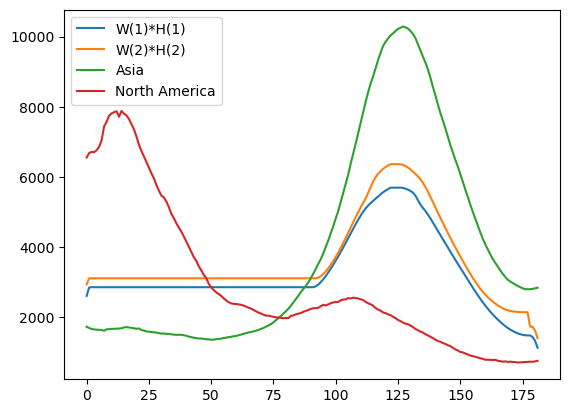

In [18]:
for i in range(r):
    plt.plot(W[:, i] * H[i, :])
plt.plot(df3['Asia'].to_numpy())
plt.plot(df3['North America'].to_numpy())
plt.legend(['W(1)*H(1)', 'W(2)*H(2)', 'Asia', 'North America'])